# Dependencies


In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tensorflow.keras.utils import to_categorical
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
# Displaying df with all columns available 
pd.set_option("display.max_columns",None)

In [8]:
# Reading and storing in data csv file
data_df = pd.read_csv("../../Data/Team_Stats/2000-2019_next_year_points.csv")

print(data_df.shape)
# Displaying dataframe
data_df.head()

(638, 60)


,Year,Rk_Off,Team,Win,Loss,Games,PF_Off,NY PF_Off,Total Yds_Off,Plays_Off,Y/P_Off,TO_Off,FL_Off,1stD_Off,Cmp_Off,Pass Att_Off,Pass Yds_Off,Pass TD_Off,Int_Off,Pass NY/A_Off,Pass 1stD_Off,Rush Att_Off,Rush Yds_Off,Rush TD_Off,Rush Y/A_Off,Rush 1stD_Off,Pen_Off,Pen Yds_Off,1stPy_Off,Sc%_Off,TO%_Off,EXP_Off,Rk_Def,PF_Def,NY PF_Def,Total Yds_Def,Ply_Def,Y/P_Def,TO_Def,FL_Def,Total 1stD_Def,Cmp_Def,Pass Att_Def,Pass Yds_Def,Pass TD_Def,Int_Def,Pass NY/A_Def,Pass 1stD_Def,Rush Att_Def,Rush Yds_Def,Rush TD_Def,Rush Y/A_Def,Rush 1stD_Def,Pen_Def,Pen Yds_Def,1stPy_Def,Sc%_Def,TO%_Def,EXP_Def,Overall Production
0,2000,1,St. Louis Rams,10,6,16,540,503.0,7075,1014,7.0,35,12,380,380,587,5232,37,23,8.3,247,383,1843,26,4.8,112,111,942,21,46.8,16.7,49.41,31,471,273.0,5494,968,5.7,25,6,321,323,534,3797,32,19,6.5,195,383,1697,18,4.4,95,101,747,31,40.9,12.4,21.56,1581
1,2000,2,Denver Broncos,11,5,16,485,340.0,6554,1115,5.9,25,13,383,354,569,4243,28,12,7.1,223,516,2311,21,4.5,124,89,792,36,38.3,11.7,-40.21,23,369,339.0,5544,962,5.8,44,17,294,310,574,3946,26,27,6.4,189,344,1598,13,4.6,80,109,898,25,30.2,20.8,104.83,1010
2,2000,3,Oakland Raiders,12,4,16,479,399.0,5776,1023,5.6,20,9,337,284,475,3306,28,11,6.6,177,520,2470,23,4.8,128,118,940,32,39.2,10.6,11.03,9,299,327.0,5249,1014,5.2,37,16,320,359,588,3698,25,21,5.9,202,383,1551,8,4.0,85,117,912,33,26.9,18.7,185.58,527
3,2000,4,Indianapolis Colts,10,6,16,429,413.0,6141,1026,6.0,29,14,357,357,571,4282,33,15,7.2,213,435,1859,14,4.3,111,89,866,33,40.4,15.2,47.85,15,326,486.0,5357,1018,5.3,22,8,310,317,530,3422,22,14,6.0,177,446,1935,13,4.3,109,103,820,24,31.1,11.7,64.32,784
4,2000,5,Minnesota Vikings,11,5,16,397,290.0,5961,958,6.2,28,10,319,307,495,3832,33,18,7.2,193,428,2129,14,5.0,107,106,908,19,39.7,14.9,-60.12,24,371,390.0,5701,1011,5.6,18,10,344,369,584,3913,23,8,6.4,208,396,1788,17,4.5,110,104,747,26,38.2,9.4,2.03,260


# EDA / Preprocessing

In [14]:
# Finding columns with null values
data_df.isnull().sum()

Year      0
Rk_Off    0
Team      0
Win       0
Loss      0
dtype: int64

In [13]:
# Dropping null columns
no_null_df = data_df.dropna(how="any")
print(no_null_df.shape)
no_null_df.head()

(606, 60)


,Year,Rk_Off,Team,Win,Loss,Games,PF_Off,NY PF_Off,Total Yds_Off,Plays_Off,Y/P_Off,TO_Off,FL_Off,1stD_Off,Cmp_Off,Pass Att_Off,Pass Yds_Off,Pass TD_Off,Int_Off,Pass NY/A_Off,Pass 1stD_Off,Rush Att_Off,Rush Yds_Off,Rush TD_Off,Rush Y/A_Off,Rush 1stD_Off,Pen_Off,Pen Yds_Off,1stPy_Off,Sc%_Off,TO%_Off,EXP_Off,Rk_Def,PF_Def,NY PF_Def,Total Yds_Def,Ply_Def,Y/P_Def,TO_Def,FL_Def,Total 1stD_Def,Cmp_Def,Pass Att_Def,Pass Yds_Def,Pass TD_Def,Int_Def,Pass NY/A_Def,Pass 1stD_Def,Rush Att_Def,Rush Yds_Def,Rush TD_Def,Rush Y/A_Def,Rush 1stD_Def,Pen_Def,Pen Yds_Def,1stPy_Def,Sc%_Def,TO%_Def,EXP_Def,Overall Production
0,2000,1,St. Louis Rams,10,6,16,540,503.0,7075,1014,7.0,35,12,380,380,587,5232,37,23,8.3,247,383,1843,26,4.8,112,111,942,21,46.8,16.7,49.41,31,471,273.0,5494,968,5.7,25,6,321,323,534,3797,32,19,6.5,195,383,1697,18,4.4,95,101,747,31,40.9,12.4,21.56,1581
1,2000,2,Denver Broncos,11,5,16,485,340.0,6554,1115,5.9,25,13,383,354,569,4243,28,12,7.1,223,516,2311,21,4.5,124,89,792,36,38.3,11.7,-40.21,23,369,339.0,5544,962,5.8,44,17,294,310,574,3946,26,27,6.4,189,344,1598,13,4.6,80,109,898,25,30.2,20.8,104.83,1010
2,2000,3,Oakland Raiders,12,4,16,479,399.0,5776,1023,5.6,20,9,337,284,475,3306,28,11,6.6,177,520,2470,23,4.8,128,118,940,32,39.2,10.6,11.03,9,299,327.0,5249,1014,5.2,37,16,320,359,588,3698,25,21,5.9,202,383,1551,8,4.0,85,117,912,33,26.9,18.7,185.58,527
3,2000,4,Indianapolis Colts,10,6,16,429,413.0,6141,1026,6.0,29,14,357,357,571,4282,33,15,7.2,213,435,1859,14,4.3,111,89,866,33,40.4,15.2,47.85,15,326,486.0,5357,1018,5.3,22,8,310,317,530,3422,22,14,6.0,177,446,1935,13,4.3,109,103,820,24,31.1,11.7,64.32,784
4,2000,5,Minnesota Vikings,11,5,16,397,290.0,5961,958,6.2,28,10,319,307,495,3832,33,18,7.2,193,428,2129,14,5.0,107,106,908,19,39.7,14.9,-60.12,24,371,390.0,5701,1011,5.6,18,10,344,369,584,3913,23,8,6.4,208,396,1788,17,4.5,110,104,747,26,38.2,9.4,2.03,260


# Targets

In [15]:
# Storing next years win loss ratio in the targets variable
targets = no_null_df.loc[:,"NY PF_Off"].values

# Displaying the targets
targets[:10]


array([503., 340., 399., 413., 290., 324., 409., 294., 320., 333.])

## Target distribution

Text(0.5, 1.015, 'Distribution of Next-year Offensive Points')

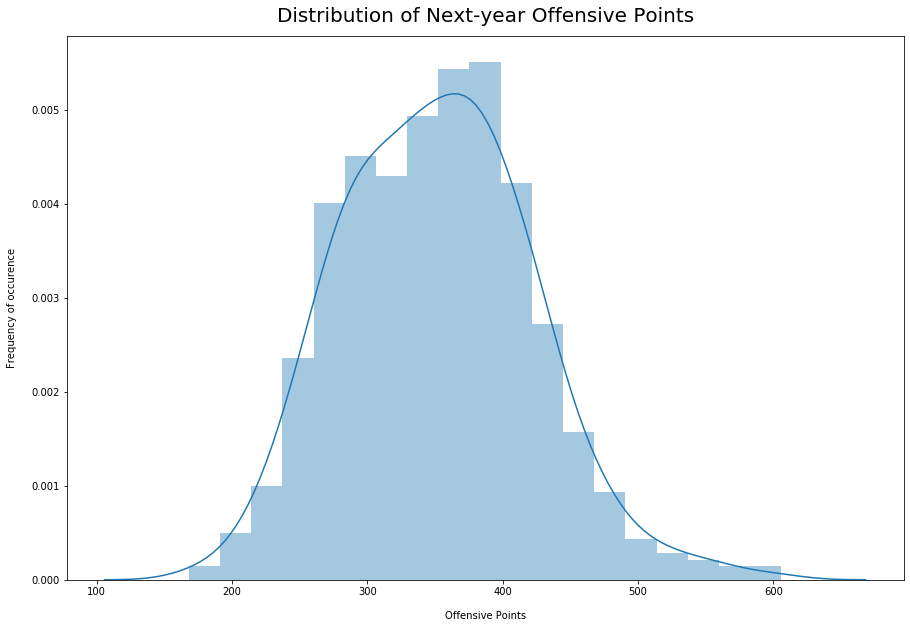

In [7]:
# Visualizing the distribution of the target data
plt.figure(figsize=(15,10)) 
sns.distplot(targets)
plt.xlabel("Offensive Points", labelpad=14)
plt.ylabel("Frequency of occurence", labelpad=14)
plt.title("Distribution of Next-year Offensive Points", y=1.015, fontsize=20)

# Inputs

In [18]:
# Storing the inputs
inputs = no_null_df.drop(columns=["NY PF_Off","NY PF_Def","Games","Year","Team"])
print(inputs.shape)
# Storing the input column names
feature_names = inputs.columns
feature_names

(606, 55)


Index(['Rk_Off', 'Win', 'Loss', 'PF_Off', 'Total Yds_Off', 'Plays_Off',
       'Y/P_Off', 'TO_Off', 'FL_Off', '1stD_Off', 'Cmp_Off', 'Pass Att_Off',
       'Pass Yds_Off', 'Pass TD_Off', 'Int_Off', 'Pass NY/A_Off',
       'Pass 1stD_Off', 'Rush Att_Off', 'Rush Yds_Off', 'Rush TD_Off',
       'Rush Y/A_Off', 'Rush 1stD_Off', 'Pen_Off', 'Pen Yds_Off', '1stPy_Off',
       'Sc%_Off', 'TO%_Off', 'EXP_Off', 'Rk_Def', 'PF_Def', 'Total Yds_Def',
       'Ply_Def', 'Y/P_Def', 'TO_Def', 'FL_Def', 'Total 1stD_Def', 'Cmp_Def',
       'Pass Att_Def', 'Pass Yds_Def', 'Pass TD_Def', 'Int_Def',
       'Pass NY/A_Def', 'Pass 1stD_Def', 'Rush Att_Def', 'Rush Yds_Def',
       'Rush TD_Def', 'Rush Y/A_Def', 'Rush 1stD_Def', 'Pen_Def',
       'Pen Yds_Def', '1stPy_Def', 'Sc%_Def', 'TO%_Def', 'EXP_Def',
       'Overall Production'],
      dtype='object')

## Dimensionality Reduction

In [9]:
# Using a forward selection algorithm to determine signifcant features
def forward_selection(data, target, significance_level=0.1):
    data = pd.DataFrame(data, columns=feature_names)
    target = pd.DataFrame(target)
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [10]:
# Storing forward selection significant features and displaying them
forward_selection_list = forward_selection(inputs, targets)
forward_selection_list

['Sc%_Off', 'Cmp_Off', 'Rk_Off', 'FL_Def', 'Sc%_Def']

In [11]:
# Using a backward elimination algorithm to determine signifcant features
def backward_elimination(data, target,significance_level = 0.1):
    data = pd.DataFrame(data,columns=feature_names)
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [12]:
# Storing backward elimination significant features and displaying them
backward_elimination_list = backward_elimination(inputs, targets)
backward_elimination_list

['PF_Off',
 'Cmp_Off',
 'Pass 1stD_Off',
 'Rush Att_Off',
 'Rush Yds_Off',
 'Rush Y/A_Off',
 'Pen_Off',
 'Total 1stD_Def',
 'TO%_Def',
 'Overall Production']

In [13]:
# Using a stepwise selection algorithm to determine signifcant features
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.1):
    data = pd.DataFrame(data, columns=feature_names)
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [14]:
# Storing stepwise selection significant features and displaying them
stepwise_selection_list = stepwise_selection(inputs, targets)
stepwise_selection_list

['Sc%_Off', 'Cmp_Off', 'Rk_Off']

In [15]:
# Creating significant feature list 
feature_list = []

# Adding siginificant features from all three wrapper methods in feature list
for feature in stepwise_selection_list:
    if feature in  backward_elimination_list and feature in forward_selection_list:
        feature_list.append(feature)
        
# Displaying length of feature list 
print(len(feature_list))

# Displaying the feature list
print(feature_list)

1
['Cmp_Off']


In [16]:
# Displaying the inputs
inputs.head()

,Rk_Off,Win,Loss,PF_Off,Total Yds_Off,Plays_Off,Y/P_Off,TO_Off,FL_Off,1stD_Off,Cmp_Off,Pass Att_Off,Pass Yds_Off,Pass TD_Off,Int_Off,Pass NY/A_Off,Pass 1stD_Off,Rush Att_Off,Rush Yds_Off,Rush TD_Off,Rush Y/A_Off,Rush 1stD_Off,Pen_Off,Pen Yds_Off,1stPy_Off,Sc%_Off,TO%_Off,EXP_Off,Rk_Def,PF_Def,Total Yds_Def,Ply_Def,Y/P_Def,TO_Def,FL_Def,Total 1stD_Def,Cmp_Def,Pass Att_Def,Pass Yds_Def,Pass TD_Def,Int_Def,Pass NY/A_Def,Pass 1stD_Def,Rush Att_Def,Rush Yds_Def,Rush TD_Def,Rush Y/A_Def,Rush 1stD_Def,Pen_Def,Pen Yds_Def,1stPy_Def,Sc%_Def,TO%_Def,EXP_Def,Overall Production
0,1,10,6,540,7075,1014,7.0,35,12,380,380,587,5232,37,23,8.3,247,383,1843,26,4.8,112,111,942,21,46.8,16.7,49.41,31,471,5494,968,5.7,25,6,321,323,534,3797,32,19,6.5,195,383,1697,18,4.4,95,101,747,31,40.9,12.4,21.56,1581
1,2,11,5,485,6554,1115,5.9,25,13,383,354,569,4243,28,12,7.1,223,516,2311,21,4.5,124,89,792,36,38.3,11.7,-40.21,23,369,5544,962,5.8,44,17,294,310,574,3946,26,27,6.4,189,344,1598,13,4.6,80,109,898,25,30.2,20.8,104.83,1010
2,3,12,4,479,5776,1023,5.6,20,9,337,284,475,3306,28,11,6.6,177,520,2470,23,4.8,128,118,940,32,39.2,10.6,11.03,9,299,5249,1014,5.2,37,16,320,359,588,3698,25,21,5.9,202,383,1551,8,4.0,85,117,912,33,26.9,18.7,185.58,527
3,4,10,6,429,6141,1026,6.0,29,14,357,357,571,4282,33,15,7.2,213,435,1859,14,4.3,111,89,866,33,40.4,15.2,47.85,15,326,5357,1018,5.3,22,8,310,317,530,3422,22,14,6.0,177,446,1935,13,4.3,109,103,820,24,31.1,11.7,64.32,784
4,5,11,5,397,5961,958,6.2,28,10,319,307,495,3832,33,18,7.2,193,428,2129,14,5.0,107,106,908,19,39.7,14.9,-60.12,24,371,5701,1011,5.6,18,10,344,369,584,3913,23,8,6.4,208,396,1788,17,4.5,110,104,747,26,38.2,9.4,2.03,260


## Input Distributions

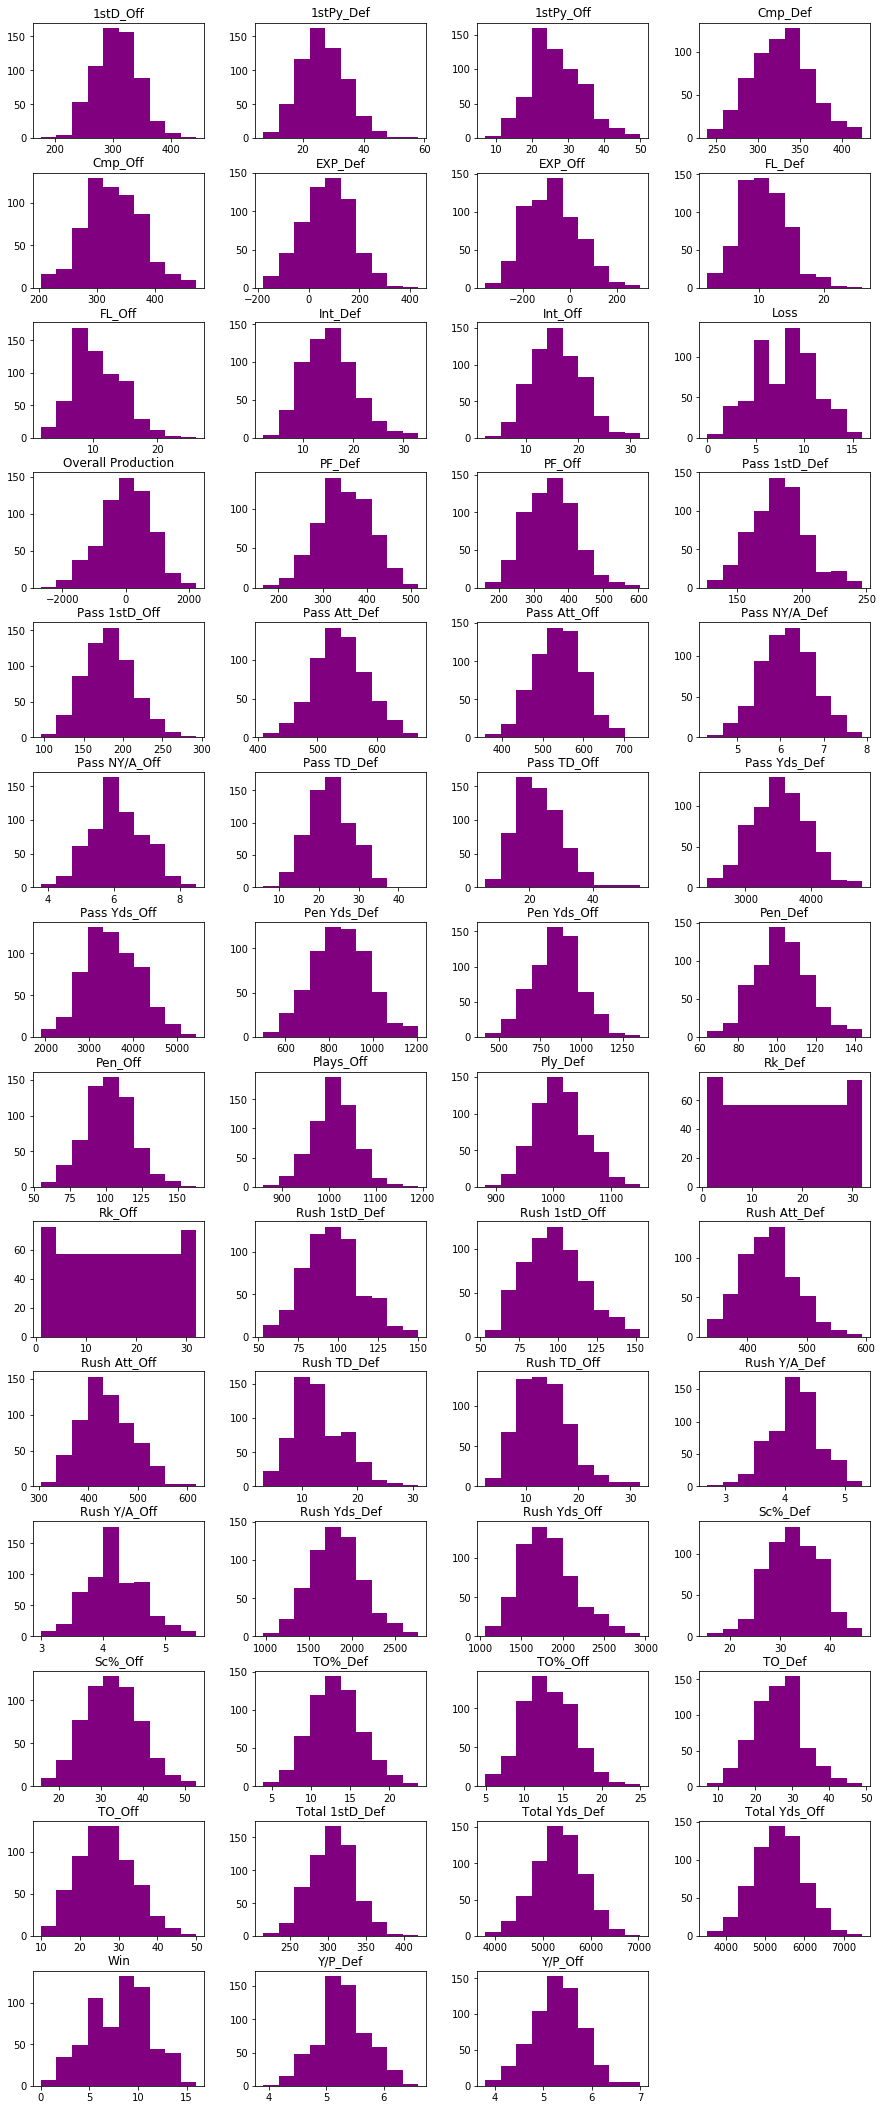

In [17]:
# Displaying the input distributions as histograms
inputs.hist(figsize=(15, 60), color="purple", grid=False, sharex=False, sharey=False, layout=(22,4))
plt.show()

# Scaling the data

In [18]:
# Creating the sc object from the StandardScaler class
sc = StandardScaler()

# Fitting and transforming the inputs
scaled_inputs = sc.fit_transform(inputs)

# Splitting the data

In [19]:
# Splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, random_state=0)

## VIF

In [20]:
# For each X, calculate VIF (Variance Inflation Factor) and save in dataframe
# VIF is a measure used to determine multicollinearity 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
vif["features"] = inputs.columns

In [21]:
# Sorting VIF in descending order
vif.sort_values("VIF Factor",ascending=False).head()

,VIF Factor,features
54,inf,Overall Production
16,inf,Pass 1stD_Off
40,inf,Int_Def
38,inf,Pass Yds_Def
44,inf,Rush Yds_Def


In [22]:
# Storing rows with VIF over 11 
inf = vif.loc[vif["VIF Factor"] > 11]

# Storing the feature names that have a VIF over 11
inf_list = list(inf['features'])

# Dropping high VIF factors
inputs = inputs.drop(columns=inf_list)
inputs

,Rush TD_Off,Pen_Off,Pen Yds_Off,Cmp_Def,Pass TD_Def,Rush TD_Def,Pen_Def,Pen Yds_Def,EXP_Def
0,26,111,942,323,32,18,101,747,21.56
1,21,89,792,310,26,13,109,898,104.83
2,23,118,940,359,25,8,117,912,185.58
3,14,89,866,317,22,13,103,820,64.32
4,14,106,908,369,23,17,104,747,2.03
...,...,...,...,...,...,...,...,...,...
601,9,110,965,299,36,16,117,991,-172.07
602,12,115,1008,362,27,12,102,791,-87.52
603,15,116,992,313,22,17,99,976,20.12
604,7,121,1112,312,17,16,92,735,4.66


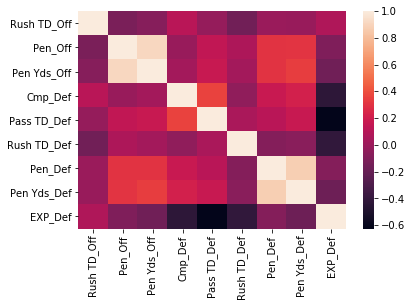

In [23]:
# Displaying correlation matrix of the inputs
corr_df = inputs.corr()
sns.heatmap(corr_df)

# ML Models

## Linear Regression

In [24]:
# Creating regressor object from Linear Regression Class
regressor = LinearRegression()

# Fitting training data on the regressor object
regressor.fit(x_train, y_train)

# Displaying the r2-score of the test data
r2 = regressor.score(x_test, y_test)

# Storing predicted values from the testing data set
y_pred = regressor.predict(x_test)

# Storing the RMSE of the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2

0.18746822644375083

In [25]:
# Storing regressor's prediction on the test data
y_pred = regressor.predict(x_test)

# Creating a dataframe of the prediciton, actual and residuals
residual_df = pd.DataFrame({"Prediction": y_pred * 16, 
              "Actual":y_test * 16, 
              "Residual": (y_test - y_pred) * 16})

# Displaying residual dataframe 
residual_df.head()

,Prediction,Actual,Residual
0,6483.554905,7216.0,732.445095
1,5102.229607,5248.0,145.770393
2,6360.108820,6560.0,199.891180
3,4949.493657,4992.0,42.506343
4,5629.086240,5504.0,-125.086240


In [26]:
# Average residual for linear regression
residual_df["Residual"].mean()

56.83775142471719

## Lasso 

In [27]:
# Creating an lasso Object from the Lasso Class
lasso = Lasso(random_state=1)

#Parameter grid for grid search
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'max_iter':[10,100,1000,5000]}

# Wrapping lasso model in gridsearch
grid = GridSearchCV(lasso, param_grid = param_grid, scoring='r2', verbose=1, n_jobs=-1)

# Fitting the grid search lasso model with the training data
grid_result = grid.fit(x_train, y_train)

# Printing the best score and parameter
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s


Best Score:  0.1582921375974194
Best Params:  {'alpha': 1, 'max_iter': 10}


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.1s finished


In [28]:
# Creating a lasso object from the Lasso Class
lasso = Lasso(random_state=1, alpha=.1, max_iter=10)

# Fitting the training data to the regressor object
lasso.fit(x_train, y_train)

# Displaying the score of the model 
lasso.score(x_test, y_test)

0.20921809147028703

## Ridge

In [29]:
# Creating ridge model object from Ridge Class
ridge = Ridge(random_state=1)

# Parameter grid for grid search
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Wrapping elastic net model in gridsearch
grid = GridSearchCV(ridge, param_grid = param_grid, scoring='r2', verbose=1, n_jobs=-1)

# Fitting the grid search ridge model with the training data
grid_result = grid.fit(x_train, y_train)

# Printing the best score and parameter
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.1615579785386631
Best Params:  {'alpha': 1000}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [30]:
# Creating a ridge object from the Ridge Class
ridge = Ridge(random_state=1, alpha=1000)

# Fitting the training data to the ridge object
ridge.fit(x_train, y_train)

# Displaying the score of the model 
ridge.score(x_test, y_test)

0.22985419780014893

## Elastic Net

In [31]:
# Creating an elasticnet Object from the ElasticNet Class
elasticnet = ElasticNet(random_state=1)

#Parameter grid for grid search
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          'l1_ratio':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# Wrapping elastic net model in gridsearch
grid = GridSearchCV(elasticnet, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

# Fitting the grid search elastic net model with the training data
grid_result = grid.fit(x_train, y_train)

# Printing the best score and parameter
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


Best Score:  0.16410985604310874
Best Params:  {'alpha': 1, 'l1_ratio': 0.8}


[Parallel(n_jobs=-1)]: Done 362 out of 385 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    0.8s finished


In [32]:
# Creating a elastic object from the Elasticnet Class
elastic = ElasticNet(random_state=1, alpha=1, l1_ratio=.9)

# Fitting the training data to the elasticnet object
elastic.fit(x_train, y_train)

# Displaying the score of the model 
elastic.score(x_test, y_test)

0.23172947165499036

## Random Forest 

In [33]:
# Creating a regressor object from the Random Forest Regressor 
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)

# Fitting the training data to the regressor object
regressor.fit(sc.inverse_transform(x_train), y_train)

# Storing the Random Forest Regressor feature importances in the importance variable
importance = sorted(zip(regressor.feature_importances_, feature_names), reverse=True)

# Displaying the importance 
importance[:10]


[(0.08580015030460927, 'PF_Off'),
 (0.08125345158294466, 'Sc%_Off'),
 (0.04078688562757808, 'Rk_Off'),
 (0.03480542245410104, '1stD_Off'),
 (0.029838452592090725, 'Total Yds_Off'),
 (0.02505881100059807, 'Pass Yds_Off'),
 (0.02133426845750753, 'Overall Production'),
 (0.02113944550522162, 'Plays_Off'),
 (0.020099587081740783, 'Pen_Off'),
 (0.020042421414904383, 'Pen Yds_Def')]

In [34]:
# Displaying the r2 score of the random forest regressor 
regressor.score(sc.inverse_transform(x_test), y_test)

0.20212171382022703

In [35]:
# Storing regressor's prediction on the test data
y_pred = regressor.predict(x_test)

# Creating a dataframe of the prediciton, actual and residuals
residual_df = pd.DataFrame({"Prediction": y_pred * 16, 
              "Actual":y_test * 16, 
              "Residual": (y_test - y_pred) * 16})

# Displaying residual dataframe 
residual_df.head()

,Prediction,Actual,Residual
0,5409.184,7216.0,1806.816
1,5409.072,5248.0,-161.072
2,5409.184,6560.0,1150.816
3,5409.184,4992.0,-417.184
4,5409.072,5504.0,94.928


In [36]:
# Average residual for Random Forest Regressor
residual_df["Residual"].mean()

279.002315789473

## Support Vector Regression

In [37]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.07349022296562346

In [38]:
# Storing regressor's prediction on the test data
y_pred = regressor.predict(x_test)

# Creating a dataframe of the prediciton, actual and residuals
residual_df = pd.DataFrame({"Prediction": y_pred * 16, 
              "Actual":y_test * 16, 
              "Residual": (y_test - y_pred) * 16})

# Displaying residual dataframe 
residual_df.head()

,Prediction,Actual,Residual
0,5637.208788,7216.0,1578.791212
1,5503.938711,5248.0,-255.938711
2,5660.676367,6560.0,899.323633
3,5386.463460,4992.0,-394.463460
4,5479.329849,5504.0,24.670151


In [39]:
# Average residual for linear regression
residual_df["Residual"].mean()

92.97220418929086

## Polynomial Linear Regression 

In [40]:
# Creating a polyReg object from the PolynomialFeatures class 
polyReg = PolynomialFeatures(degree = 3)

# Fitting and transforming the featuring training data to have the polyReg Object's degrees
polyInputs = polyReg.fit_transform(x_train)

# Creating a regressor object from the LinearRegression Class
regressor = LinearRegression()

# Fitting the regressor with the transformed input data and the target training data
regressor.fit(polyInputs,y_train)

# Displaying the score of the polynomial regressor
regressor.score(polyReg.transform(x_test),y_test)

-0.9793641828340561

In [41]:
# Storing regressor's prediction on the test data
y_pred = regressor.predict(polyReg.transform(x_test))

# Creating a dataframe of the prediciton, actual and residuals
residual_df = pd.DataFrame({"Prediction": y_pred * 16, 
              "Actual":y_test * 16, 
              "Residual": (y_test - y_pred) * 16})

# Displaying residual dataframe 
residual_df.head()

,Prediction,Actual,Residual
0,14157.423916,7216.0,-6941.423916
1,5696.168837,5248.0,-448.168837
2,5653.006446,6560.0,906.993554
3,4001.082085,4992.0,990.917915
4,9297.888874,5504.0,-3793.888874


In [42]:
# Average residual for linear regression
residual_df["Residual"].mean()

41.558087361672065

## K-neighbors

In [43]:
# Creating an knr Object from the K-neighbors Regressor Class
knr = KNeighborsRegressor()

# Parameter grid for grid search
param_grid = {'leaf_size': list(range(1,50,5)), 
              'n_neighbors' : list(range(1,30,3)),
              'p' : [1,2]}

# Wrapping knr model in gridsearch
grid = GridSearchCV(knr, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

# Fitting the grid search knr model with the training data
grid_result = grid.fit(x_train, y_train.reshape(-1,))

# Printing the best score and parameter
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)



Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 743 tasks      | elapsed:    1.8s


Best Score:  0.13314806018692368
Best Params:  {'leaf_size': 1, 'n_neighbors': 28, 'p': 2}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.0s finished


In [44]:
# Making the knr object from the KneighborsRegressor Class
knr = KNeighborsRegressor(leaf_size=1, n_neighbors=28, p=2)

# Fitting the model on the training data
knr.fit(x_train, y_train)

# Scoring the test dataset
knr.score(x_test, y_test)

0.20704489661016368

## Gradient Boosted Regressor

In [45]:
# parameters = {
#     "n_estimators":[5,50,250,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,100]
# }
# rf = GradientBoostingRegressor()
# grid = GridSearchCV(rf, parameters, 
#                           cv = 3, n_jobs = -1, verbose = 1)
# grid_result = grid.fit(x_train, y_train)

# # Printing the best score and parameter
# print('Best Score: ', grid_result.best_score_)
# print('Best Params: ', grid_result.best_params_)

In [46]:
# Creating a gbr class from the GradientBoostingRegressor Object
gbr = GradientBoostingRegressor(random_state=0)

# Fitting the model with unscalled data
gbr.fit(sc.inverse_transform(x_train), y_train)

# Displaying the score on the test data set
gbr.score(sc.inverse_transform(x_test), y_test)

0.1383553134259643

## Neural Network

In [47]:
optimizer = Adam(learning_rate=0.01)
loss = 'mse'

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss= loss, optimizer=optimizer, metrics=['mse','mae','accuracy'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7168      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 40,369
Trainable params: 40,369
Non-trainable params: 0
_________________________________________________________________


In [48]:
epochs = 250
batch_size = 10
callback = EarlyStopping(monitor="val_loss",patience=5)

history = NN_model.fit(x_train,y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_split=0.3,
             callbacks=[callback])


Train on 317 samples, validate on 137 samples
Epoch 1/250
317/317 [==============================] - 2s 7ms/sample - loss: 48495.3184 - mse: 48495.3281 - mae: 185.3095 - accuracy: 0.0000e+00 - val_loss: 16705.5885 - val_mse: 16705.5879 - val_mae: 102.3831 - val_accuracy: 0.0000e+00
Epoch 2/250
317/317 [==============================] - 0s 653us/sample - loss: 12356.3506 - mse: 12356.3506 - mae: 87.7394 - accuracy: 0.0000e+00 - val_loss: 12280.6846 - val_mse: 12280.6836 - val_mae: 89.9282 - val_accuracy: 0.0000e+00
Epoch 3/250
317/317 [==============================] - 0s 694us/sample - loss: 7772.8712 - mse: 7772.8721 - mae: 70.3302 - accuracy: 0.0000e+00 - val_loss: 10855.9317 - val_mse: 10855.9326 - val_mae: 83.3113 - val_accuracy: 0.0000e+00
Epoch 4/250
317/317 [==============================] - 0s 549us/sample - loss: 7339.5482 - mse: 7339.5483 - mae: 69.9112 - accuracy: 0.0000e+00 - val_loss: 9621.6613 - val_mse: 9621.6611 - val_mae: 79.4015 - val_accuracy: 0.0000e+00
Epoch 5/250


In [49]:
test_loss, test_mse, test_mae, test_accuracy = NN_model.evaluate(x_test,y_test)

152/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [50]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,mae,accuracy,val_loss,val_mse,val_mae,val_accuracy,epoch
6,4290.404257,4290.404785,52.025711,0.0,9190.002141,9190.001953,73.220108,0.0,6
7,4095.920638,4095.920654,52.449612,0.0,11280.409201,11280.409180,83.330750,0.0,7
8,4822.134461,4822.134277,55.018101,0.0,8967.957819,8967.958008,72.789680,0.0,8
9,5987.026553,5987.026855,61.382530,0.0,9998.955606,9998.957031,80.733673,0.0,9
10,6494.336926,6494.336914,63.568901,0.0,8359.832660,8359.833008,73.123604,0.0,10


Text(0, 0.5, 'MSE [Revenue]')

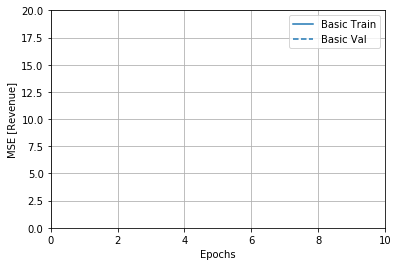

In [51]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=0)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE')

# Checks for multicolinearity

Text(0.5, 1, 'Multi-Collinearity of Football Stats')

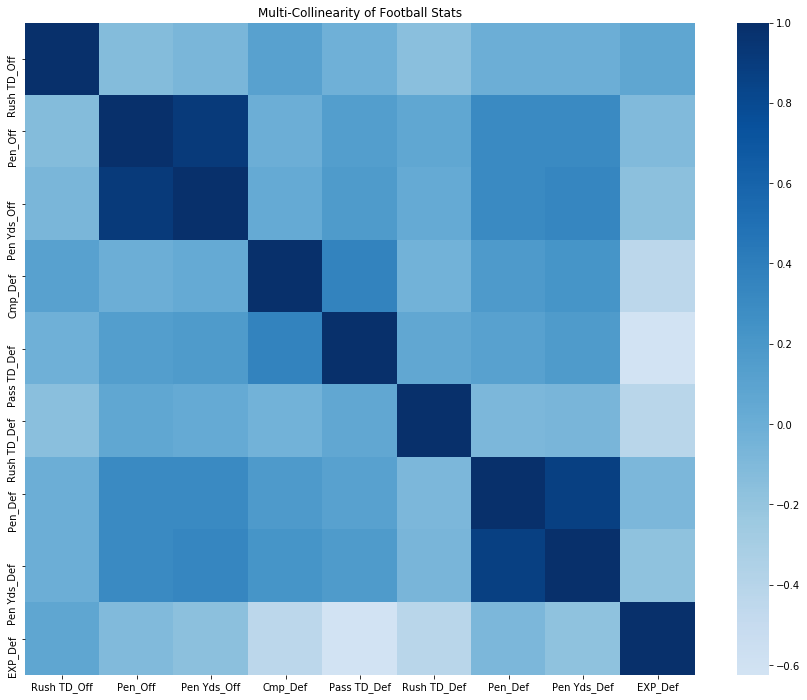

In [52]:
# Storing subplots in fig and ax variables
fig, ax = plt.subplots(figsize=(15,12))

# Creating a seaborn heatmap with inputs df
sns.heatmap(inputs.corr(), center=0, cmap="Blues")#annot=True

# Setting the title 
ax.set_title("Multi-Collinearity of Football Stats")